In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# fontsize

In [2]:
title = 20
legend = 15
tick = 13
axis_label = 15

# PART 1: Analysis of Step Response for Plant 
- Calculate static gain, overshoot, and settling time and discuss implications
- Examine and explain how m and b affect performance
- Plot step response of the base system and these variations


        1
-----------------
1.2e+04 s + 19.54

Settling Time : 2403.240324032403
Static Gain : 0.05117706833320373
% Overshoot : 0.0%


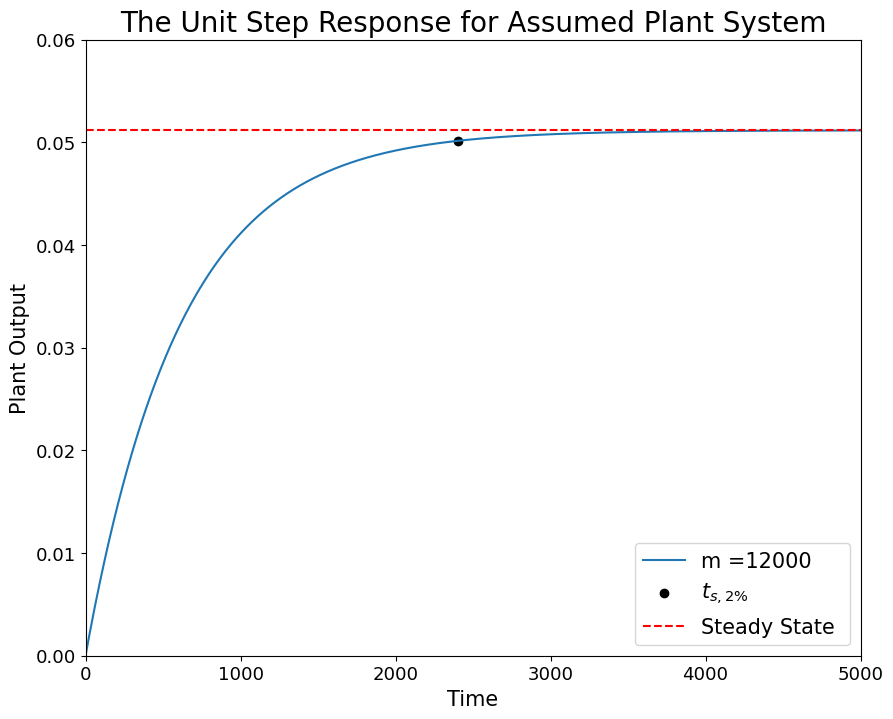

In [3]:
# Calculate static gain, overshoot, and settling time and discuss implications

b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

nom = [1]
den = [m, b]

plant_tf =ct.tf(nom,den)
print(plant_tf)

T = np.linspace(0,10000,10000)

# Unit Step Response
t,y = ct.step_response(plant_tf, T)
plt.plot(t,y, label = 'm =' + str(m))
plt.title("The Unit Step Response for Assumed Plant System", fontsize = title)
y_inverted = y[::-1]


# Settling Time
for j in range(len(y)):
    if abs(y[-1]-y[j]) < 0.02*y[-1]:
        ts_index = j
        break
plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
print("Settling Time : {}".format(t[ts_index]))

# print static gain
print("Static Gain : {}".format(y[-1]))

# overshoot
OS_index = np.argmax(y)
OS = np.max(y)/y[-1] - 1
print("% Overshoot : {}%".format(OS*100))

plt.xlim(0,5000)
plt.ylim(0,0.06)
plt.axhline(1, c = 'black')
plt.axhline(y[-1], c = 'red', linestyle = 'dashed', label = 'Steady State ')

plt.legend(fontsize = legend, loc = 'lower right')
plt.xticks(fontsize = tick); plt.yticks(fontsize = tick)
plt.xlabel("Time", fontsize = axis_label)
plt.ylabel("Plant Output", fontsize = axis_label)

plt.show()

- Settling time needs to be reduced and the static gain must be increased significantly

m = 10000
Settling Time : 2002.200220022002
Static Gain : 0.051177072504347006
% Overshoot : 0.0%
m = 12000
Settling Time : 2403.240324032403
Static Gain : 0.05117706833320373
% Overshoot : 0.0%
m = 14000
Settling Time : 2803.280328032803
Static Gain : 0.05117702825279478
% Overshoot : 0.0%
m = 16000
Settling Time : 3203.320332033203
Static Gain : 0.05117681842546661
% Overshoot : 0.0%
m = 18000
Settling Time : 3603.360336033603
Static Gain : 0.05117608510218123
% Overshoot : 0.0%


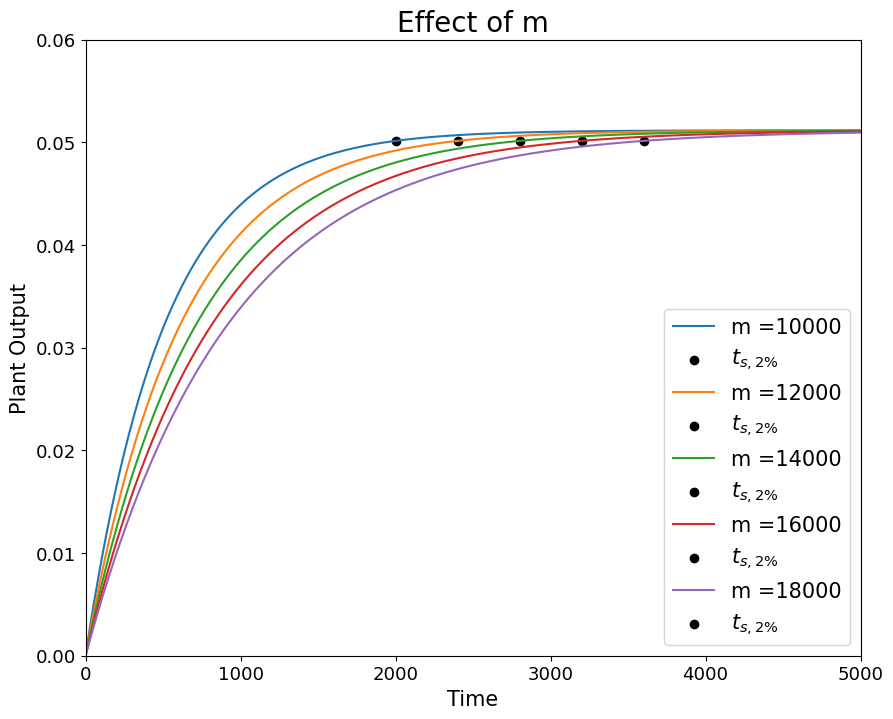

In [4]:
# Examine and explain how m affect performance

b = 19.54 # SI unit

plt.figure(figsize=(10,8))
plt.title("Effect of m", fontsize = title)

# Changing mass
for m in range(10000, 20000, 2000):
    print('='*40)
    print('m =',m)

    nom = [1]
    den = [m, b]
    
    plant_tf =ct.tf(nom,den)
    # print(plant_tf)
    
    T = np.linspace(0,10000,10000)
    
    # Unit Step Response
    t,y = ct.step_response(plant_tf, T)
    plt.plot(t,y, label = 'm =' + str(m))
    
    y_inverted = y[::-1]
    

    # Settling Time
    for j in range(len(y)):


        if abs(y[-1]-y[j]) < 0.02*y[-1]:
            ts_index = j
            break
    plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
    print("Settling Time : {}".format(t[ts_index]))

    # print static gain
    print("Static Gain : {}".format(y[-1]))
    
    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1] - 1
    print("% Overshoot : {}%".format(OS*100))

plt.xlim(0,5000)
plt.ylim(0,0.06)
plt.axhline(1, c = 'black')
plt.legend(fontsize = legend, loc = 'lower right')
plt.xticks(fontsize = tick); plt.yticks(fontsize = tick)
plt.xlabel("Time", fontsize = axis_label)
plt.ylabel("Plant Output", fontsize = axis_label)
plt.show()

- Increasing m delays the settling time

b = 20
Settling Time : 2347.234723472347
Static Gain : 0.049999997111124544
% Overshoot : 0.0%
b = 40
Settling Time : 1174.117411741174
Static Gain : 0.025000000000000154
% Overshoot : 0.0%
b = 60
Settling Time : 783.078307830783
Static Gain : 0.016666666666666757
% Overshoot : 0.0%
b = 80
Settling Time : 587.058705870587
Static Gain : 0.012499999999999626
% Overshoot : 0.0%
b = 100
Settling Time : 470.04700470047
Static Gain : 0.009999999999999964
% Overshoot : 0.0%


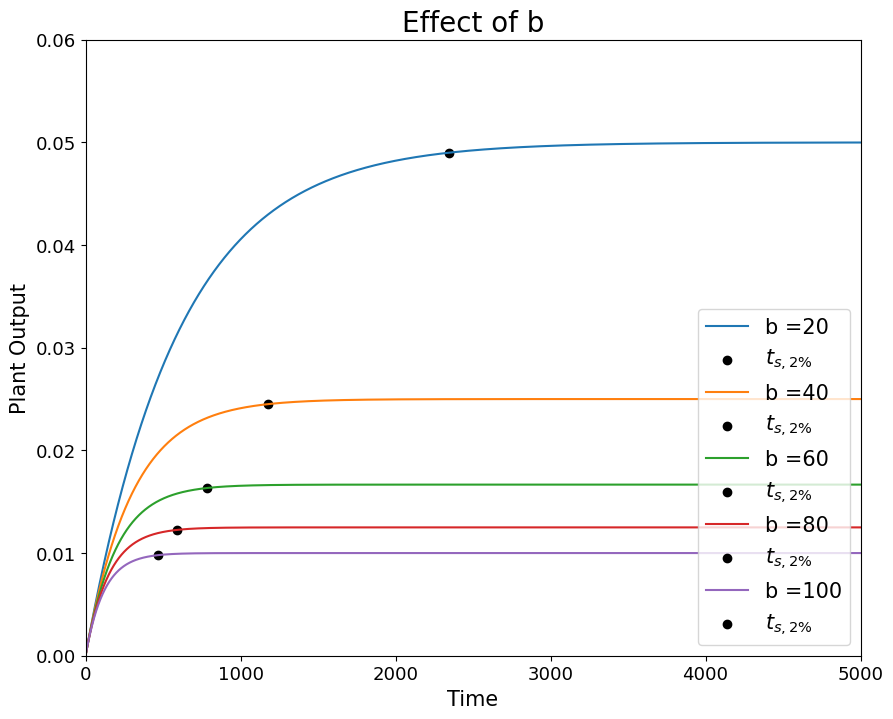

In [5]:
# Examine and explain how b affect performance

m = 12000 # kg

plt.figure(figsize=(10,8))
plt.title("Effect of b", fontsize = title)

# Changing damping coefficient b
for b in range(20, 120, 20):
    print('='*40)
    print('b =',b)

    nom = [1]
    den = [m, b]
    
    plant_tf =ct.tf(nom,den)
    # print(plant_tf)
    
    T = np.linspace(0,10000,10000)
    
    # Unit Step Response
    t,y = ct.step_response(plant_tf, T)
    plt.plot(t,y, label = 'b =' + str(b))
    
    y_inverted = y[::-1]
    

    # Settling Time
    for j in range(len(y)):


        if abs(y[-1]-y[j]) < 0.02*y[-1]:
            ts_index = j
            break
    plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
    print("Settling Time : {}".format(t[ts_index]))

    # print static gain
    print("Static Gain : {}".format(y[-1]))
    
    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1] - 1
    print("% Overshoot : {}%".format(OS*100))

plt.xlim(0,5000)
plt.ylim(0,0.06)
plt.axhline(1, c = 'black')
plt.legend(fontsize = legend, loc = 'lower right')
plt.xticks(fontsize = tick); plt.yticks(fontsize = tick)
plt.xlabel("Time", fontsize = axis_label)
plt.ylabel("Plant Output", fontsize = axis_label)
plt.show()

- Increasing b reduces settling time, but makes the static gain drop as well.

## Change Kp in Proportional Control

Kd = 0, Kp = 1000, Ki = 0
Settling Time : 46.05460546054605
Static Gain : 0.9808344939874557
% Overshoot : 0.0%
Kd = 0, Kp = 2000, Ki = 0
Settling Time : 23.25232523252325
Static Gain : 0.9903245293482571
% Overshoot : 0.0%
Kd = 0, Kp = 3000, Ki = 0
Settling Time : 15.551555155515551
Static Gain : 0.9935288156474043
% Overshoot : 0.0%
Kd = 0, Kp = 4000, Ki = 0
Settling Time : 11.701170117011701
Static Gain : 0.9951387472198236
% Overshoot : 0.0%


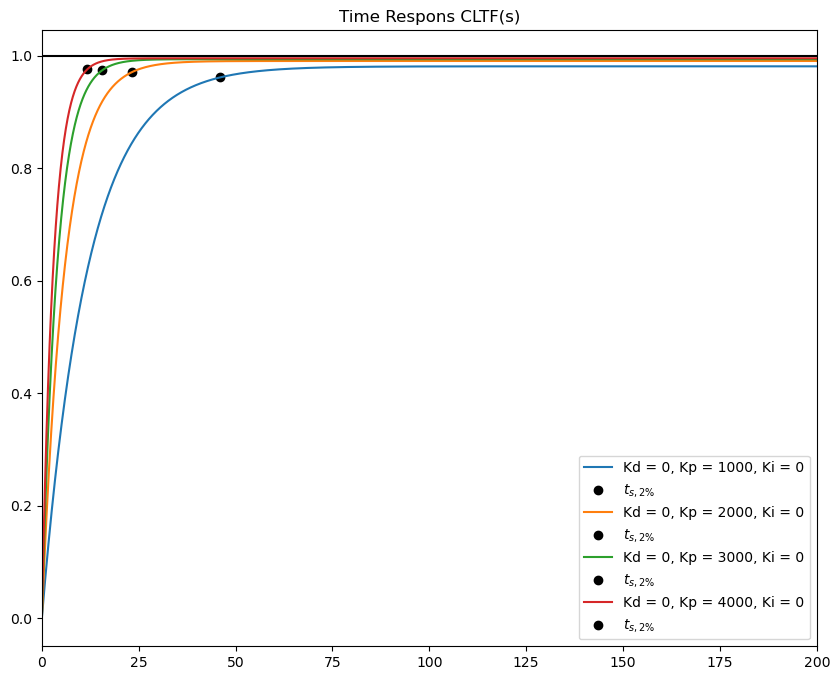

In [6]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

# Changing Proportional Control
for i in range(100, 500, 100):

    Kd = 0
    Kp = i*10
    Ki = 0

    print('='*40)
    print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

    nom = [Kd, Kp, Ki]
    den = [Kd+m, Kp+b, Ki]
    
    cl_tf =ct.tf(nom,den)
    # print(cl_tf)
    
    T = np.linspace(0,500,10000)
    
    # Unit Step Response
    t,y = ct.step_response(cl_tf, T)
    name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 
    plt.plot(t,y, label = name)
    plt.title("Time Respons CLTF(s)")
    y_inverted = y[::-1]
    

    # Settling Time
    for j in range(len(y)):
        if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
            ts_index = len(y)-j
            break
    plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
    print("Settling Time : {}".format(t[ts_index]))

    # print static gain
    print("Static Gain : {}".format(y[-1]))
    
    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1] - 1
    print("% Overshoot : {}%".format(OS*100))

plt.xlim(0,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

# Change Ki in PI control

Kd = 0, Kp = 5143, Ki = 10
Static Gain : 1.0002814971864535
% Overshoot : 0.04183200205929438%
Kd = 0, Kp = 5143, Ki = 300
Static Gain : 1.0000000000000002
% Overshoot : 8.51613343354025%
Kd = 0, Kp = 5143, Ki = 555.25
Static Gain : 0.9999999999999999
% Overshoot : 13.328987441180207%


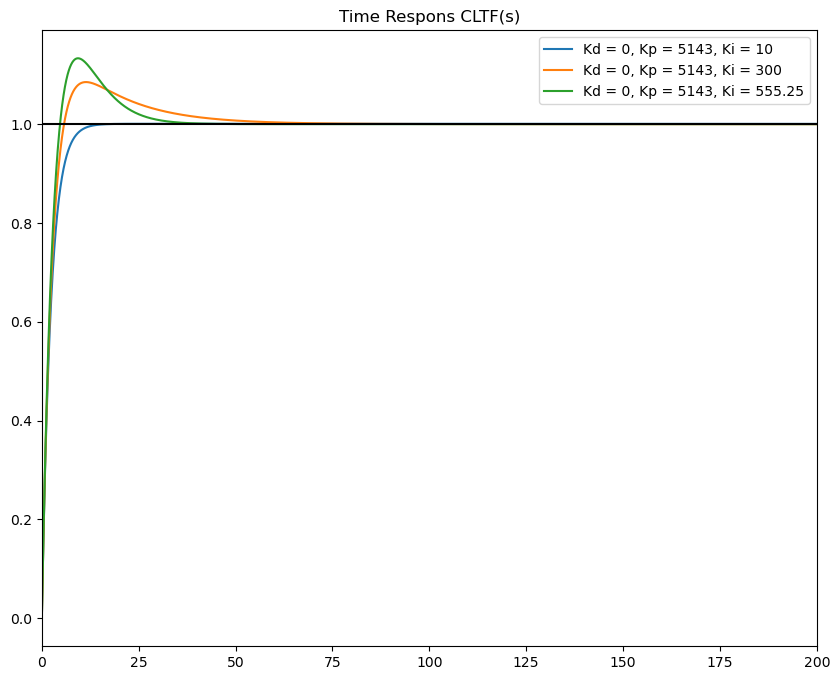

In [7]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))
lst=[10,300,555.25]#,2000,5000]#,5000,10000]
# Changing Integral Control
for i in lst:

    Kd = 0
    Kp = 5143
    Ki = i

    print('='*40)
    print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

    nom = [Kd, Kp, Ki]
    den = [Kd+m, Kp+b, Ki]
    
    cl_tf =ct.tf(nom,den)
    # print(cl_tf)
    
    T = np.linspace(0,500,10000)
    
    # Unit Step Response
    t,y = ct.step_response(cl_tf, T)
    name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 
    plt.plot(t,y, label = name)
    plt.title("Time Respons CLTF(s)")
    y_inverted = y[::-1]
    

    # Settling Time
#     for j in range(len(y)):
#         if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
#             ts_index = len(y)-j
#             break
#     plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
#     print("Settling Time : {}".format(t[ts_index]))

    # print static gain
    print("Static Gain : {}".format(y[-1]))
    
    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1] - 1
    print("% Overshoot : {}%".format(OS*100))

plt.xlim(0,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

# Change Kd in PID Control

Kd = 1000, Kp = 2000, Ki = 50
0.07692307692307693
Settling Time : 86.40864086408641
Static Gain : 1.0000000561574542
% Overshoot : 8.534580717789009%
Kd = 2000, Kp = 2000, Ki = 50
0.14285714285714285
Settling Time : 87.2087208720872
Static Gain : 1.000000040890859
% Overshoot : 8.359505366546994%
Kd = 3000, Kp = 2000, Ki = 50
0.2
Settling Time : 88.1088108810881
Static Gain : 1.0000000284666162
% Overshoot : 8.1947030606492%
Kd = 4000, Kp = 2000, Ki = 50
0.25
Settling Time : 89.00890089008901
Static Gain : 1.000000018670654
% Overshoot : 8.039112376022505%


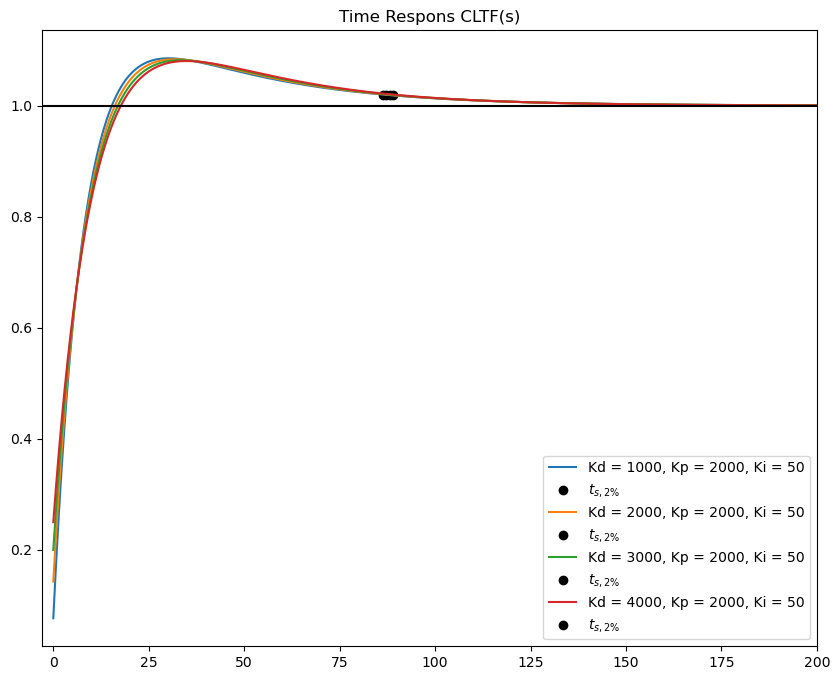

In [8]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

# Changing Proportional Control
for i in range(10, 50, 10):

    Kd = i*100
    Kp = 2000
    Ki = 50
    # Kd = 1
    # Kp = 1
    # Ki = 1

    print('='*40)
    print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

    nom = [Kd, Kp, Ki]
    den = [Kd+m, Kp+b, Ki]
    
    cl_tf =ct.tf(nom,den)
    # print(cl_tf)
    
    T = np.linspace(0,500,10000)
    
    # Unit Step Response
    t,y = ct.step_response(cl_tf, T)
    name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 

    plt.plot(t,y, label = name)
    plt.title("Time Respons CLTF(s)")
    y_inverted = y[::-1]

    print(y[0])

    # Settling Time
    for j in range(len(y)):
        if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
            ts_index = len(y)-j
            break
    plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
    print("Settling Time : {}".format(t[ts_index]))

    # print static gain
    print("Static Gain : {}".format(y[-1]))
    
    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1]-1
    print("% Overshoot : {}%".format(OS*100))

plt.xlim(-3,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

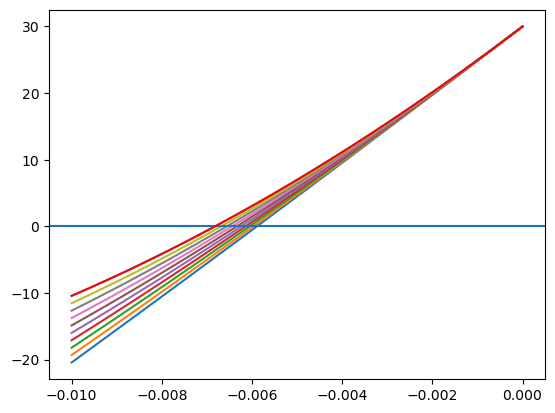

In [9]:
a=np.linspace(0,100000,10)
x=np.linspace(-0.01,0,1000)
for i in a:    
    y=(12000+i)*x**2+(5143+19.45)*x+30
    plt.plot(x,y)
plt.axhline(0)
y=(12000+100000)*x**2+(5143+19.45)*x+30
plt.plot(x,y,'r')
plt.show()


# Desired Output

- Overshoot = less than 1km/h = 0.3m/s. Average Velocity = 50km/h = 13.89m/s -> 0.3/7 => Less Than 2.2%
- 2% Settling Time =<> 10s (풀악셀 제로백 5초..)
- Static Gain >= 0.99

Kd = 100, Kp = 5000, Ki = 6.086
Settling Time : 9.5009500950095
Static Gain : 0.9994601974123565
% Overshoot : 0.0%


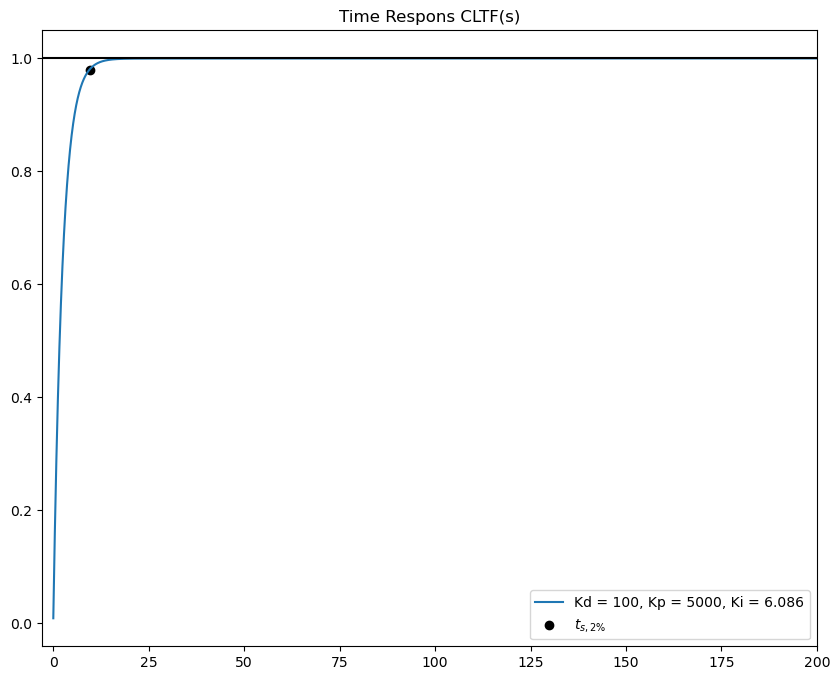

In [10]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

# Changing Proportional Control
Kd = 100
Kp = 5000
Ki = 6.086
# Kd = 1
# Kp = 1
# Ki = 1

print('='*40)
print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den)
# print(cl_tf)

T = np.linspace(0,500,10000)

# Unit Step Response
t,y = ct.step_response(cl_tf, T)
name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 

plt.plot(t,y, label = name)
plt.title("Time Respons CLTF(s)")

y_inverted = y[::-1]
    
# Settling Time
for j in range(len(y)):
    if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
        ts_index = len(y)-j
        break
plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
print("Settling Time : {}".format(t[ts_index]))

# print static gain
print("Static Gain : {}".format(y[-1]))

# overshoot
OS_index = np.argmax(y)
OS = np.max(y)/y[-1] - 1
print("% Overshoot : {}%".format(OS*100))

plt.xlim(-3,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

# PART 2 : PID Controller Design 

# Pole Placement
- Overshoot = less than 1km/h = 0.3m/s. Average Velocity = 50km/h = 13.89m/s -> 0.3/7 => Less Than 2.2%
- 2% Settling Time =<> 10s (풀악셀 제로백 5초..)
- Static Gain >= 0.99

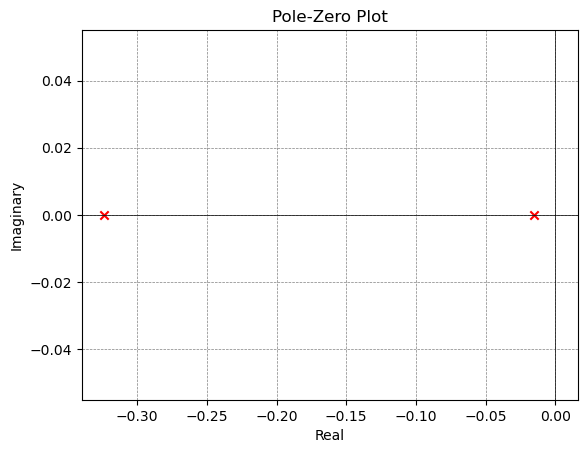

In [11]:
b = 19.54 # SI unit
m = 12000 # kg

Kd = 5750
Kp = 6000
Ki = 90

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den) 

# Get poles of the transfer function
poles = ct.pole(cl_tf)

# Plot poles on the complex plane
plt.scatter(poles.real, poles.imag, marker='x', color='red')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

In [12]:
poles

array([-0.3234531 +0.j, -0.01567591+0.j])

# Root Locus 

## For Kp

In [13]:
title = 20
legend = 15
tick = 13
axis_label = 15

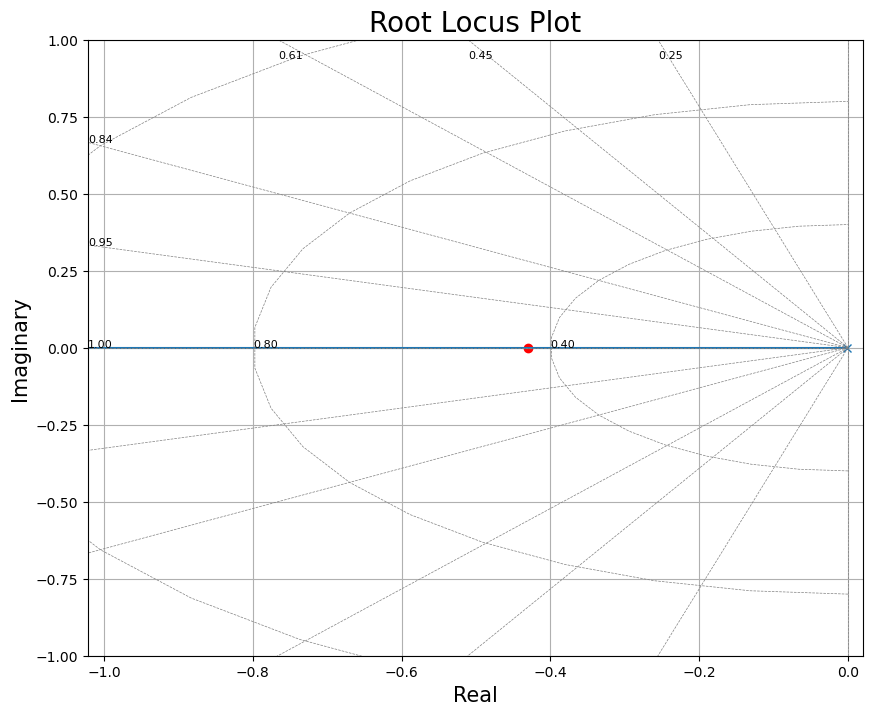

In [15]:
b = 19.54 # SI unit
m = 12000 # kg

Kd = 100
Kp = 5000
Ki = 6.086

nom = [1]
den = [m,b]


ol_tf =ct.tf(nom,den)

# Plot the root locus
plt.figure(figsize=(10,8))
rlist, klist = ct.root_locus(ol_tf, plot=True)

for i, k in enumerate(klist):
    if k > 5000 and k < 5500:
        plt.scatter(rlist[i], 0, c = 'r')
        desired_idx = i
        break

# plt.plot(rlist[:,0], rlist[:,1])
plt.title('Root Locus Plot',fontsize=title)
plt.xlabel('Real',fontsize=axis_label)
plt.ylabel('Imaginary',fontsize=axis_label)
plt.grid(True)
plt.show()

In [16]:
klist[i]

5142.857142857143

## Set Kp = 5143, Root Locus for Ki

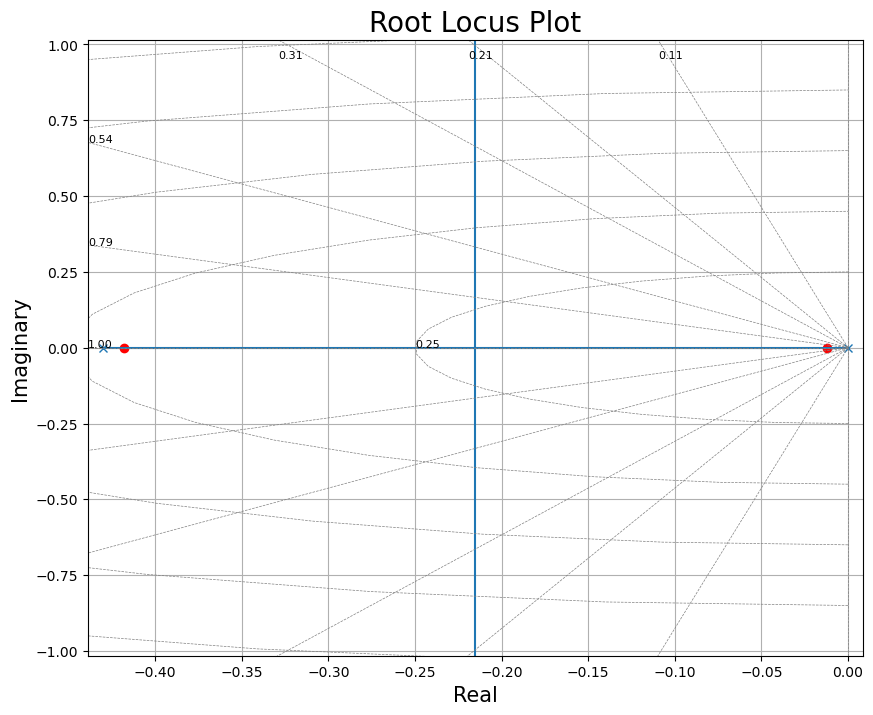

In [17]:
b = 19.54 # SI unit
m = 12000 # kg

nom = [1]
den = [m, b+5143, 0]


ol_tf =ct.tf(nom,den)

# Plot the root locus
plt.figure(figsize=(10,8))
rlist, klist = ct.root_locus(ol_tf, plot=True)
test = 1
plt.scatter(rlist[test].real, rlist[test].imag, c = 'r')
# plt.scatter(-0.4290,0, c = 'r')

# for i, k in enumerate(klist):
#     if k > 5000 and k < 5500:
#         plt.scatter(rlist[i], 0, c = 'r')
#         desired_idx = i
#         break

# plt.plot(rlist[:,0], rlist[:,1])
plt.title('Root Locus Plot',fontsize=title)
plt.xlabel('Real',fontsize=axis_label)
plt.ylabel('Imaginary',fontsize=axis_label)
plt.grid(True)
plt.show()

In [18]:
test = 1
print(klist[test])
print("Lets say, Ki = 30")

61.224489795918366
Lets say, Ki = 30


## Set Kp = 5143, Ki = 30, root locus for Kd

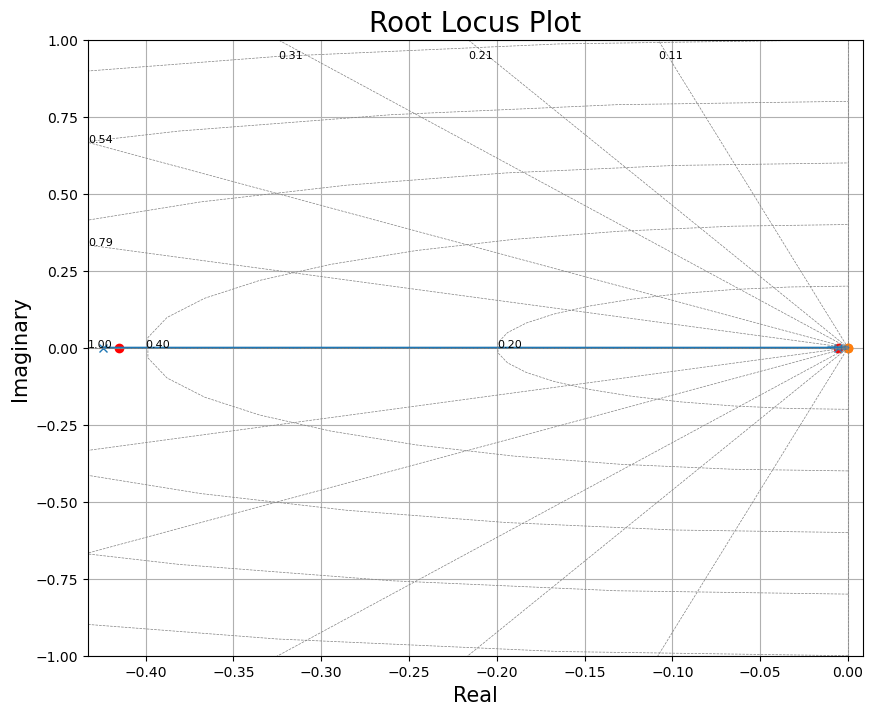

In [19]:
b = 19.54 # SI unit
m = 12000 # kg

Kp = 5143
Ki = 30

nom = [1,0,0]
den = [m, Kp+b, Ki]

ol_tf =ct.tf(nom,den)

# Plot the root locus
plt.figure(figsize=(10,8))
rlist, klist = ct.root_locus(ol_tf, plot=True)

test = 1
# print(klist[test])
plt.scatter(rlist[test].real, rlist[test].imag, c = 'r')

plt.title('Root Locus Plot',fontsize=title)
plt.xlabel('Real',fontsize=axis_label)
plt.ylabel('Imaginary',fontsize=axis_label)
plt.grid(True)
plt.show()

## Test step output from root-locus result

Kd = 100, Kp = 5143, Ki = 30
Settling Time : 8.450845084508451
Static Gain : 1.0005355249547823
% Overshoot : 0.8322594127394112%


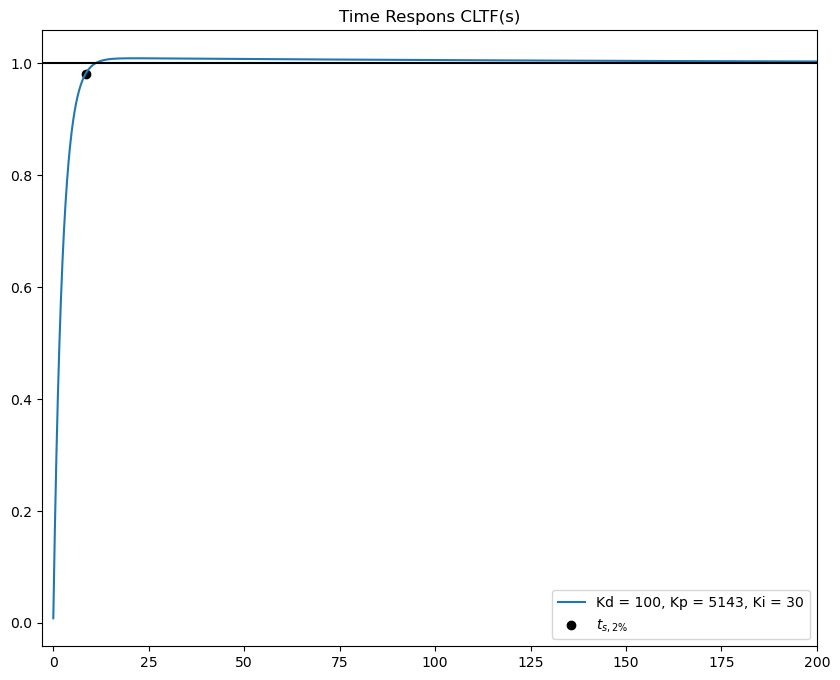

In [20]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

# Changing Proportional Control
Kd = 100
Kp = 5143
Ki = 30

print('='*40)
print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den)
# print(cl_tf)

T = np.linspace(0,500,10000)

# Unit Step Response
t,y = ct.step_response(cl_tf, T)
name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 

plt.plot(t,y, label = name)
plt.title("Time Respons CLTF(s)")

y_inverted = y[::-1]
    
# Settling Time
for j in range(len(y)):
    if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
        ts_index = len(y)-j
        break
plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
print("Settling Time : {}".format(t[ts_index]))

# print static gain
print("Static Gain : {}".format(y[-1]))

# overshoot
OS_index = np.argmax(y)
OS = np.max(y)/y[-1] - 1
print("% Overshoot : {}%".format(OS*100))

plt.xlim(-3,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

# Frequency Response 

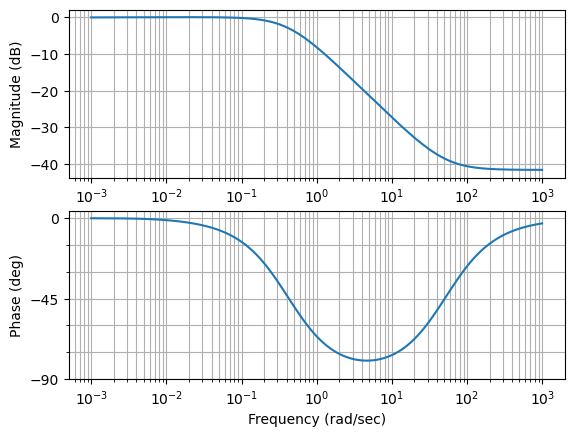

In [21]:
Kd = 100
Kp = 5143
Ki = 30

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den)

# nom = [1]
# den = [m, b]

# ol_tf =ct.tf(nom,den)

frequency, magnitude, phase = ct.bode(cl_tf, dB = True)
# frequency, magnitude, phase = ct.bode(ol_tf, dB = True)

In [22]:
print(cl_tf)


  100 s^2 + 5143 s + 30
--------------------------
1.21e+04 s^2 + 5163 s + 30



In [23]:
cl_tf.poles()

array([-0.42076373+0.j, -0.00589247+0.j])

In [ ]:
cl_tf.zeros()

# Plot Bode Plot with m,b variations

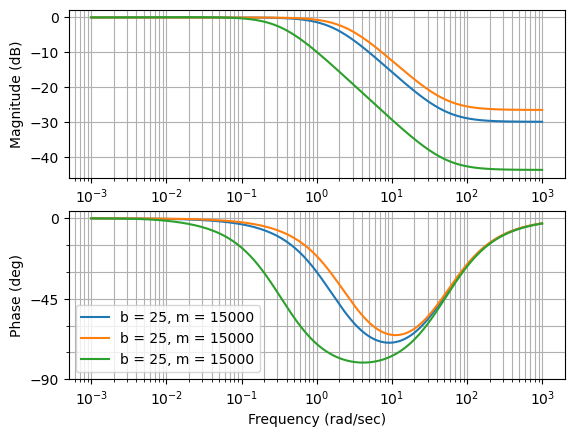

In [24]:
Kd = 100
Kp = 5143
Ki = 30

b = 19.54 # SI unit
m = 12000 # kg

b = 15
m = 3000

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den)

b = 10
m = 2000

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]
cl_tf2 = ct.tf(nom,den)

b = 25
m = 15000

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]
cl_tf3 = ct.tf(nom,den)

frequency, magnitude, phase = ct.bode(cl_tf, dB = True, label='b = ' + str(b)+', m = '+str(m))
frequency, magnitude, phase = ct.bode(cl_tf2, dB = True, label='b = ' + str(b)+', m = '+str(m))
frequency, magnitude, phase = ct.bode(cl_tf3, dB = True, label='b = ' + str(b)+', m = '+str(m))

plt.legend()

Kd = 0, Kp = 1000, Ki = 0
Settling Time : 46.05460546054605
Static Gain : 98.08344939874691
% Overshoot : 0.0%
Kd = 0, Kp = 2000, Ki = 0
Settling Time : 23.25232523252325
Static Gain : 99.03245293482661
% Overshoot : 0.0%
Kd = 0, Kp = 3000, Ki = 0
Settling Time : 15.551555155515551
Static Gain : 99.35288156474184
% Overshoot : 0.0%
Kd = 0, Kp = 4000, Ki = 0
Settling Time : 11.701170117011701
Static Gain : 99.51387472198303
% Overshoot : 0.0%


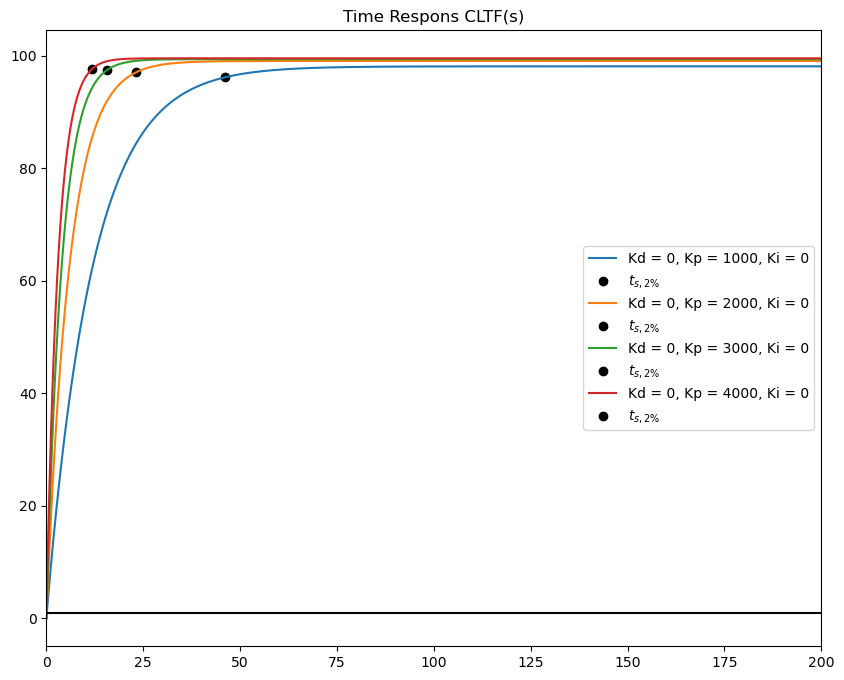

In [25]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

# Changing Proportional Control
for i in range(100, 500, 100):

    Kd = 0
    Kp = i*10
    Ki = 0

    print('='*40)
    print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

    nom = [Kd, Kp, Ki]
    den = [Kd+m, Kp+b, Ki]
    
    cl_tf =ct.tf(nom,den)
    # print(cl_tf)
    
    T = np.linspace(0,500,10000)
    
    # Unit Step Response
    # Create a step input with amplitude 100
    step_input = 100 * np.ones_like(T)

    # Simulate the system's response to the step input
    t, y = ct.forced_response(cl_tf, T, step_input)    
    name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 
    plt.plot(t,y, label = name)
    plt.title("Time Respons CLTF(s)")
    y_inverted = y[::-1]
    

    # Settling Time
    for j in range(len(y)):
        if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
            ts_index = len(y)-j
            break
    plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
    print("Settling Time : {}".format(t[ts_index]))

    # print static gain
    print("Static Gain : {}".format(y[-1]))
    
    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1] - 1
    print("% Overshoot : {}%".format(OS*100))

plt.xlim(0,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

In [27]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

def optimize_pid(plant_transfer_function):
    # Plant model
    plant = ctrl.TransferFunction(plant_transfer_function)

    # Ziegler-Nichols tuning method
    _, _, Ku, Tu = ctrl.matlab.margin(plant)
    Kp = 0.6 * Ku
    Ki = 2 / Tu
    Kd = Tu / 8

    # PID controller
    pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

    # Closed-loop system
    system_open = plant * pid_controller
    system_closed = ctrl.feedback(system_open)

    # Time vector
    time, response = ctrl.matlab.step(system_closed)

    # Plot the response
    plt.plot(time, response)
    plt.title('Step Response with Optimized PID Controller')
    plt.xlabel('Time')
    plt.ylabel('System Response')
    plt.grid(True)
    plt.show()

    # Display PID parameters
    print("Optimized PID Parameters:")
    print(f"Kp: {Kp}, Ki: {Ki}, Kd: {Kd}")

# Plant transfer function (example: 1 / (s^2 + 2s + 1))
plant_transfer_function = [1]
numerator = [1]
denominator = [1, 2, 1]

optimize_pid(plant_transfer_function)


In [29]:
import cvxpy as cp

b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

Kd = cp.Variable()
Kp = cp.Variable()
Ki = cp.Variable()

def costfunction(p,i,d):
    nom = [d, p, i]
    den = [d+m, p+b, i]
    cl_tf =ct.tf(nom,den)
    T = np.linspace(0,500,10000)
    t,y = ct.step_response(cl_tf, T)
    for j in range(len(y)):
        if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
            ts_index = len(y)-j
            break
    settling = t[ts_index]
    gain = t[ts_index]
    os = np.max(y)/y[-1] - 1

    
import control.optimal as opc

Kd = cp.Variable()
Kp = cp.Variable()
Ki = cp.Variable()

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den)

constraints = [Kd>=0, Kp>=0, Ki >=0]


res = opc.solve_ocp(sys, timepts, X0, costfunction, constraints)

constraints = [Kd>=0, Ki>=0, Kd>=0]
objective = cp.Minimize(cp.norm([Kp,Ki,Kd], 2) + cp.norm())

prob = cp.Problem(objective, constraints)
prob.solve(solver = cp.MOSEK, verbose = True)

- Overshoot = less than 1km/h = 0.3m/s. Average Velocity = 50km/h = 13.89m/s -> 0.3/7 => Less Than 2.2%
- 2% Settling Time =<> 10s (zero to hundred 5sec..)
- Static Gain >= 0.99

In [ ]:
import random
from deap import base, creator, tools, algorithms
import control as ctrl
import numpy as np

# Define the plant transfer function (modify this based on your system)
b = 19.54 # SI unit
m = 12000 # kg
plant_num = [1]
plant_den = [m, b]
plant_system = ctrl.TransferFunction(plant_num, plant_den)

# Define the target closed-loop system specifications (overshoot, settling time, etc.)
# Modify these values based on your requirements
target_overshoot = 2.2
target_settling_time = 10

# Define the simulation time and time step
time = np.linspace(0, 10, 1000)
dt = time[1]

# Define the fitness function
def fitness_function(pid_params):
    # Simulate the closed-loop system with the PID controller
    pid_controller = ctrl.TransferFunction([pid_params[0], pid_params[1], pid_params[2]],
                                           [1, 0])
    closed_loop_system = ctrl.feedback(pid_controller * plant_system, 1)

    # Get the closed-loop step response
    _, yout = ctrl.step_response(closed_loop_system, time)

    # Evaluate fitness based on overshoot and settling time
    overshoot = max(yout) - 1  # Assuming a unit step input
    settling_time = time[next(i for i, y in enumerate(yout) if y > 1.02)] - time[0]

    # Minimize overshoot and settling time
    fitness = 1 / (1 + overshoot + settling_time)

    return fitness,

# Genetic Algorithm setup
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 5000)  # PID gains range (modify as needed)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Create an initial population of controllers
population = toolbox.population(n=50)

# Define the number of generations
generations = 1000

# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# Begin the evolution

evol = 0

while True:
    evol += 1
    # Select the next generation individuals
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.2)

    # Evaluate offspring
    fitnesses = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit

    # Select the next generation
    population = toolbox.select(population + offspring, k=len(population))

    # Exit loop if the requirements are met
    best_individual = tools.selBest(population, k=1)[0]
    Kp = best_individual[0]
    Ki = best_individual[1]
    Kd = best_individual[2]
    nom = [Kd, Kp, Ki]
    den = [Kd+m, Kp+b, Ki]

    cl_tf =ct.tf(nom,den)
    y_inverted = y[::-1]
    
    # Settling Time
    for j in range(len(y)):
        if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
            ts_index = len(y)-j
            break

    set_t = t[ts_index]

    # overshoot
    OS_index = np.argmax(y)
    OS = np.max(y)/y[-1] - 1

    if evol // 20000 == 0:
        print(set_t, OS)
    if set_t < 10 and OS < 2.2:
        break


# Get the best individual (controller)
best_individual = tools.selBest(population, k=1)[0]

# Print the best individual and its fitness value
print("Best PID Controller Gains:", best_individual)
# print("Best Fitness Value:", best_individual.fitness.values[0])

In [ ]:
b = 19.54 # SI unit
m = 12000 # kg

plt.figure(figsize=(10,8))

# Changing Proportional Control
Kp = best_individual[0]
Ki = best_individual[1]
Kd = best_individual[2]

print('='*40)
print("Kd = {}, Kp = {}, Ki = {}".format(Kd, Kp, Ki))

nom = [Kd, Kp, Ki]
den = [Kd+m, Kp+b, Ki]

cl_tf =ct.tf(nom,den)
# print(cl_tf)

T = np.linspace(0,500,10000)

# Unit Step Response
t,y = ct.step_response(cl_tf, T)
name = "Kd = " + str(Kd) + ", Kp = " + str(Kp) + ", Ki = " + str(Ki) 

plt.plot(t,y, label = name)
plt.title("Time Respons CLTF(s)")

y_inverted = y[::-1]
    
# Settling Time
for j in range(len(y)):
    if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
        ts_index = len(y)-j
        break
plt.scatter(t[ts_index], y[ts_index],color='k', label = '$t_{s,2\%}$')
print("Settling Time : {}".format(t[ts_index]))

# print static gain
print("Static Gain : {}".format(y[-1]))

# overshoot
OS_index = np.argmax(y)
OS = np.max(y)/y[-1] - 1
print("% Overshoot : {}%".format(OS*100))

plt.xlim(-3,200)

plt.axhline(1, c = 'black')
plt.legend()
plt.show()

In [ ]:
# Reinforcement Learning

def Eval(Kp, Ki, Kd):

    nom = [Kd, Kp, Ki]
    den = [Kd+m, Kp+b, Ki]

    y_inverted = y[::-1]
    
    # Settling Time
    for j in range(len(y)):
        if abs(y_inverted[0]-y_inverted[j]) > 0.02*y_inverted[0]:
            ts_index = len(y)-j
            break

    set_t = t[ts_index]

    # overshoot
    OS = np.max(y)/y[-1] - 1

    return OS<2.2, set_t<10
    

Kp = np.random.rand() * 6000
Ki = np.random.rand() * 100
Kd = np.random.rand() * 6000

for i in range(10000):

    os_r, ts_r = Eval(Kp, Ki, Kd)
    if os_r == False and ts_r == False:
        Kp = np.random.rand() * 6000
        Ki = np.random.rand() * 100
        Kd = np.random.rand() * 6000

    if os_r == False and ts_r == False:
        Kd = np.random.rand() * 6000

    if os_r == True and ts_r == False:
        Ki = np.random.rand() * 100

    if os_r == True and ts_r == True:
        print(Kp, Ki, Kd)
        break
    